In [21]:
import numpy as np
import matplotlib.pyplot as plt

from researchai.layers import Dense
from researchai.activations import ReLU
from researchai.optimizers import SGD, AdaGrad
from researchai.activations import Softmax
from researchai.commons import Softmax_CrossEntropy
from researchai.metrics import classification_accuracy
from researchai.datasets import spiral

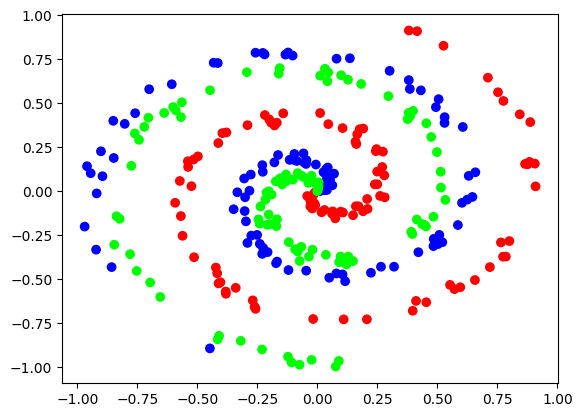

In [22]:
num_classes = 3
X, y = spiral(samples=100, classes=num_classes)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

In [23]:
# expected initial loss
-np.log(1/num_classes)

1.0986122886681098

In [24]:
dense1 = Dense(2, 64, non_linearity="ReLU")
activation1 = ReLU()
dense2 = Dense(64, num_classes)
loss_fn = Softmax_CrossEntropy()

optimizer = SGD(lr=1, lr_decay=0.1)

for epoch in range(10_001):
    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    logits = dense2.forward(activation1.outputs)

    loss = loss_fn.forward(logits, y)
    accuracy = classification_accuracy(logits, y) 

    print(loss)

    # Backward pass
    loss_fn.backward()
    dense2.backward(loss_fn.inputs_grad)
    activation1.backward(dense2.inputs_grad)
    dense1.backward(activation1.inputs_grad)

    optimizer.step(dense1)
    optimizer.step(dense2)


1.153825956828058
1.0742282520108257
1.0691281344386894
1.0670818040547239
1.0691136014779874
1.0696669769563636
1.074055212831631
1.0751905432614697
1.0797236916949986
1.079488929214777
1.0821121418730948
1.0801584456460462
1.0809149229305057
1.0779609556400305
1.0775708182265968
1.0744972483547972
1.0735932694071995
1.07073305203126
1.0697142457290325
1.0672158764859379
1.0662437928801334
1.0640765832813945
1.0631432546069504
1.0612709893100787
1.0604502185807663
1.058872060273516
1.0581204505421242
1.056770389178707
1.0561356613033472
1.0549578708433054
1.0543471197890308
1.0533243911536607
1.0528168822693964
1.0518875562469008
1.051363924703516
1.0505435308342408
1.0500779007935968
1.0493369754553263
1.048923500595869
1.0482803788635722
1.0479176727936943
1.0473472982207166
1.0470078991972316
1.0464940354729848
1.0461826572277113
1.0456958829813803
1.0453883088369056
1.0449433350831696
1.0446752357316929
1.0442961126165209
1.0440740301538278
1.0437144349860343
1.043513447376495
1.0

In [25]:
accuracy*100

95.0